In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import plotly.express as px
from sklearn.model_selection import cross_val_score,KFold
from sklearn.metrics import r2_score
from tabulate import tabulate
from sklearn.model_selection import GridSearchCV
import warnings
from sklearn.decomposition import PCA
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("C:/Users/raman/Imarticus/workSpace/Taxi Fare Prediction/Dataset/TaxiFare.csv")

In [3]:
df.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [5]:
df.shape

(50000, 8)

In [6]:
df.columns

Index(['unique_id', 'amount', 'date_time_of_pickup', 'longitude_of_pickup',
       'latitude_of_pickup', 'longitude_of_dropoff', 'latitude_of_dropoff',
       'no_of_passenger'],
      dtype='object')

In [7]:
df.isnull().sum()

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             50000 non-null  object 
 1   amount                50000 non-null  float64
 2   date_time_of_pickup   50000 non-null  object 
 3   longitude_of_pickup   50000 non-null  float64
 4   latitude_of_pickup    50000 non-null  float64
 5   longitude_of_dropoff  50000 non-null  float64
 6   latitude_of_dropoff   50000 non-null  float64
 7   no_of_passenger       50000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.1+ MB


In [18]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
amount,50000.0,11.364171,9.685557,-5.000000,6.000000,8.500000,12.500000,200.000000
longitude_of_pickup,50000.0,-72.509756,10.393860,-75.423848,-73.992062,-73.981840,-73.967148,40.783472
latitude_of_pickup,50000.0,39.933759,6.224857,-74.006893,40.734880,40.752678,40.767360,401.083332
longitude_of_dropoff,50000.0,-72.504616,10.407570,-84.654241,-73.991152,-73.980082,-73.963584,40.851027
latitude_of_dropoff,50000.0,39.926251,6.014737,-74.006377,40.734372,40.753372,40.768167,43.415190
no_of_passenger,50000.0,1.667840,1.289195,0.000000,1.000000,1.000000,2.000000,6.000000


<AxesSubplot:>

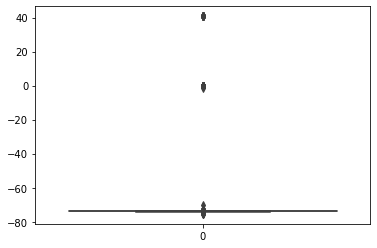

In [16]:
sns.boxplot(data=df.longitude_of_pickup)

In [17]:
df.longitude_of_pickup.

33716

In [125]:
q3 = df["longitude_of_pickup"].quantile(0.75)  
q1 = df["longitude_of_pickup"].quantile(0.25)
IQR = q3 - q1
lower_limit = q1 - (IQR * 1.5)
upper_limit = q3 + (IQR * 1.5)
df['longitude_of_pickup'] = np.where(df['longitude_of_pickup'] >= upper_limit,upper_limit,np.where(df['longitude_of_pickup'] <= lower_limit,lower_limit,df['longitude_of_pickup']))

<AxesSubplot:>

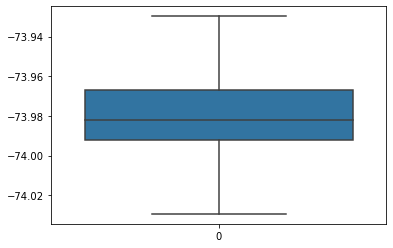

In [22]:
sns.boxplot(data=df.longitude_of_pickup)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             50000 non-null  object 
 1   amount                50000 non-null  float64
 2   date_time_of_pickup   50000 non-null  object 
 3   longitude_of_pickup   50000 non-null  float64
 4   latitude_of_pickup    50000 non-null  float64
 5   longitude_of_dropoff  50000 non-null  float64
 6   latitude_of_dropoff   50000 non-null  float64
 7   no_of_passenger       50000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.1+ MB


In [24]:
df.latitude_of_pickup.nunique()

36594

<AxesSubplot:>

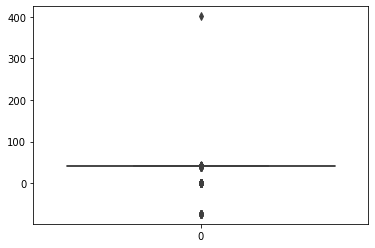

In [25]:
sns.boxplot(data=df.latitude_of_pickup)

In [126]:
q3 = df["latitude_of_pickup"].quantile(0.75)  
q1 = df["latitude_of_pickup"].quantile(0.25)
IQR = q3 - q1
lower_limit = q1 - (IQR * 1.5)
upper_limit = q3 + (IQR * 1.5)
df['latitude_of_pickup'] = np.where(df['latitude_of_pickup'] >= upper_limit,upper_limit,np.where(df['latitude_of_pickup'] <= lower_limit,lower_limit,df['latitude_of_pickup']))

<AxesSubplot:>

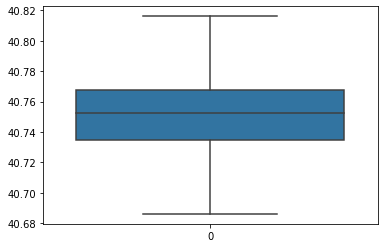

In [27]:
sns.boxplot(data=df.latitude_of_pickup)

<AxesSubplot:>

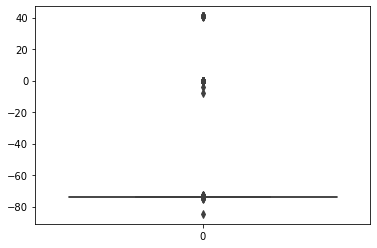

In [28]:
sns.boxplot(data=df.longitude_of_dropoff)

In [127]:
q3 = df["longitude_of_dropoff"].quantile(0.75)  
q1 = df["longitude_of_dropoff"].quantile(0.25)
IQR = q3 - q1
lower_limit = q1 - (IQR * 1.5)
upper_limit = q3 + (IQR * 1.5)
df['longitude_of_dropoff'] = np.where(df['longitude_of_dropoff'] >= upper_limit,upper_limit,np.where(df['longitude_of_dropoff'] <= lower_limit,lower_limit,df['longitude_of_dropoff']))

<AxesSubplot:>

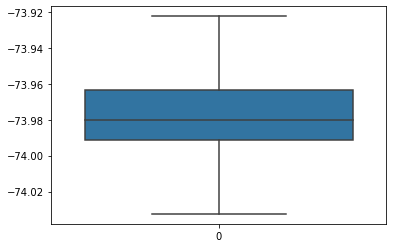

In [30]:
sns.boxplot(data=df.longitude_of_dropoff)

<AxesSubplot:>

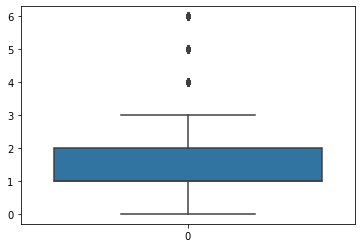

In [31]:
sns.boxplot(data=df.no_of_passenger)

In [128]:
q3 = df["no_of_passenger"].quantile(0.75)  
q1 = df["no_of_passenger"].quantile(0.25)
IQR = q3 - q1
lower_limit = q1 - (IQR * 1.5)
upper_limit = q3 + (IQR * 1.5)
df['no_of_passenger'] = np.where(df['no_of_passenger'] >= upper_limit,upper_limit,np.where(df['no_of_passenger'] <= lower_limit,lower_limit,df['no_of_passenger']))

<AxesSubplot:>

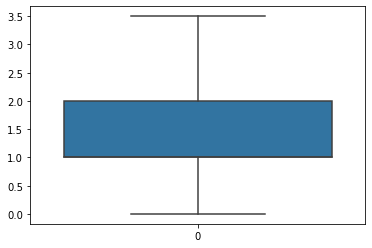

In [33]:
sns.boxplot(data=df.no_of_passenger)

In [34]:
df.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.929777,40.721319,-73.922231,40.712278,1.0
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0


In [36]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O' and feature!='amount']

In [37]:
numerical_features

['longitude_of_pickup',
 'latitude_of_pickup',
 'longitude_of_dropoff',
 'latitude_of_dropoff',
 'no_of_passenger']

In [131]:
for i in numerical_features:
    print("\nCorrelation between amount and",i,":")
    correlation,p_value=0,0
    correlation,p_value=pearsonr(df[i],df['amount'])
    print("Correlation = ",correlation,"\nP_value = ",p_value)
    if p_value>0.05:
        print("Not Significant.")
    else:
        print("Significant.")  


Correlation between amount and longitude_of_pickup :
Correlation =  0.005944001456507458 
P_value =  0.1838157578409672
Not Significant.

Correlation between amount and latitude_of_pickup :
Correlation =  -0.007338403223518277 
P_value =  0.10081860815435854
Not Significant.

Correlation between amount and longitude_of_dropoff :
Correlation =  0.0042855934105456486 
P_value =  0.33792750377417274
Not Significant.

Correlation between amount and latitude_of_dropoff :
Correlation =  -0.005442157211467343 
P_value =  0.22364914014294268
Not Significant.

Correlation between amount and no_of_passenger :
Correlation =  0.016582786495278962 
P_value =  0.000208749277799925
Significant.


In [110]:
x = df.drop(['amount','unique_id','date_time_of_pickup','latitude_of_dropoff'],axis=1)
y = df['amount']
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.2,random_state=42)

In [111]:
scaler=MinMaxScaler()
train_x=scaler.fit_transform(train_x)
test_x=scaler.transform(test_x)

In [112]:
modelrfr = RandomForestRegressor(random_state=42)
modelrfr.fit(train_x,train_y)

RandomForestRegressor(random_state=42)

In [113]:
modelrfr.score(train_x,train_y)

0.928911788995324

In [114]:
modelrfr.score(test_x,test_y)

0.6237053892798992

In [78]:
'''rfr_train = r2_score(train_y,modelrfr.predict(train_x))
rfr_test = r2_score(test_y,modelrfr.predict(test_x))
rmse_rfr_train = mean_squared_error(train_y, modelrfr.predict(train_x), squared=False)
rmse_rfr_test = mean_squared_error(test_y, modelrfr.predict(test_x), squared=False)'''

'rfr_train = r2_score(train_y,modelrfr.predict(train_x))\nrfr_test = r2_score(test_y,modelrfr.predict(test_x))\nrmse_rfr_train = mean_squared_error(train_y, modelrfr.predict(train_x), squared=False)\nrmse_rfr_test = mean_squared_error(test_y, modelrfr.predict(test_x), squared=False)'

In [3]:
x = df.drop(['amount','unique_id','date_time_of_pickup'],axis=1)
y = df['amount']
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.2,random_state=42)

In [4]:
scaler=MinMaxScaler()
train_x=scaler.fit_transform(train_x)
test_x=scaler.transform(test_x)

In [5]:
modelrfr = RandomForestRegressor(random_state=42)
modelrfr.fit(train_x,train_y)

RandomForestRegressor(random_state=42)

In [6]:
modelrfr.score(train_x,train_y)

0.944875349948034

In [119]:
modelrfr.score(test_x,test_y)

0.7297559925292163

In [90]:
kf=KFold(n_splits=5)

In [91]:
score=cross_val_score(modelrfr,train_x,train_y,cv=kf)

In [92]:
score

array([0.70558802, 0.72645188, 0.75477063, 0.76719934, 0.74550829])

In [134]:
score.mean()

0.7399036346419928

In [20]:
clf = GridSearchCV(RandomForestRegressor(),{
    'n_estimators':[10,50,100],
    'max_depth' : [2,5,8],
    'max_features' : ['auto','sqrt','log2']
},  cv = 5, return_train_score=False)

clf.fit(train_x,train_y)


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [2, 5, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [10, 50, 100]})

In [21]:
clf.cv_results_

{'mean_fit_time': array([0.28137922, 1.32164855, 2.9385735 , 0.15296173, 0.64656363,
        1.27072091, 0.1392345 , 0.64656343, 1.28672338, 0.63695722,
        3.11278033, 6.28957567, 0.26566105, 1.39394846, 2.78402438,
        0.28967137, 1.39554963, 2.79910264, 0.97143922, 4.83161225,
        9.70264068, 0.44651017, 2.15093956, 4.27947435, 0.42730436,
        2.15574417, 4.32108297]),
 'std_fit_time': array([0.00237851, 0.29877803, 0.04793356, 0.01671391, 0.01176108,
        0.01852661, 0.01647395, 0.02790423, 0.01709262, 0.02610205,
        0.01339799, 0.05160988, 0.00784097, 0.04154867, 0.01304597,
        0.01175954, 0.02509239, 0.04365469, 0.01933725, 0.05146298,
        0.05972353, 0.02550823, 0.01551895, 0.03628629, 0.01395044,
        0.06190611, 0.05450699]),
 'mean_score_time': array([0.        , 0.01312227, 0.03140993, 0.00673981, 0.01440277,
        0.02560477, 0.00320172, 0.01440244, 0.02400579, 0.00640488,
        0.01920567, 0.03681188, 0.00800462, 0.01920571, 0.033609

In [22]:
clf_df = pd.DataFrame(clf.cv_results_)

In [36]:
clf_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.281379,0.002379,0.000000,0.000000,2,auto,10,"{'max_depth': 2, 'max_features': 'auto', 'n_es...",0.398993,0.412901,0.430098,0.403857,0.422118,0.413593,0.011433,26
1,1.321649,0.298778,0.013122,0.005197,2,auto,50,"{'max_depth': 2, 'max_features': 'auto', 'n_es...",0.400810,0.414944,0.426306,0.402780,0.423741,0.413716,0.010456,25
2,2.938574,0.047934,0.031410,0.011533,2,auto,100,"{'max_depth': 2, 'max_features': 'auto', 'n_es...",0.401782,0.414811,0.426304,0.403096,0.424128,0.414024,0.010226,24
3,0.152962,0.016714,0.006740,0.006543,2,sqrt,10,"{'max_depth': 2, 'max_features': 'sqrt', 'n_es...",0.370217,0.417273,0.431004,0.379754,0.415705,0.402791,0.023512,27
4,0.646564,0.011761,0.014403,0.005987,2,sqrt,50,"{'max_depth': 2, 'max_features': 'sqrt', 'n_es...",0.418999,0.428738,0.450090,0.400588,0.428870,0.425457,0.016058,21


In [24]:
clf.best_params_

{'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 100}

In [35]:
clf.best_score_

0.6576394877967424

In [41]:
clf_df[['param_max_depth','param_max_features','param_n_estimators','mean_test_score']]

,param_max_depth,param_max_features,param_n_estimators,mean_test_score
0,2,auto,10,0.413593
1,2,auto,50,0.413716
2,2,auto,100,0.414024
3,2,sqrt,10,0.402791
4,2,sqrt,50,0.425457
5,2,sqrt,100,0.428410
6,2,log2,10,0.415420
7,2,log2,50,0.423068
8,2,log2,100,0.427586
9,5,auto,10,0.592943


In [15]:
dir(clf)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_is_fitted',
 '_check_n_features',
 '_check_refit_for_multimetric',
 '_estimator_type',
 '_format_results',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_pairwise',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_required_parameters',
 '_run_search',
 '_validate_data',
 'best_estimator_',
 'best_index_',
 'best_params_',
 'best_score_',
 'classes_',
 'cv',
 'cv_results_',
 'decision_function',
 'error_score',
 'estimator',
 'fit',
 'get_params',
 'inverse_transform',
 'multimetric_',
 'n_features_in_',
 'n_jobs',
 'n_splits

In [13]:
clf.score

<bound method BaseSearchCV.score of GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'poisson'],
                         'max_depth': [2, 5, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [10, 50, 100]})>

In [139]:
conda install scikit-learn=0.17

Note: you may need to restart the kernel to use updated packages.

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.



PackagesNotFoundError: The following packages are not available from current channels:

  - scikit-learn=0.17

Current channels:

  - https://repo.anaconda.com/pkgs/main/win-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/win-64
  - https://repo.anaconda.com/pkgs/r/noarch
  - https://repo.anaconda.com/pkgs/msys2/win-64
  - https://repo.anaconda.com/pkgs/msys2/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.


